In [6]:
from game import Game
import json
import os
from env import Env
from random_agent import RandomAgent
from threshold_agent import ThresholdAgent
from policy_iteration_agent import PolicyIterationAgent

''' Calculate card probabilities which affect state transition probabilities for Policy Iteration's required state space
'''

[ win_probabilities, loss_probabilities, flop_probabilities, range_probabilities ] = Game.get_transition_probabilities_for_cards()

with open(os.path.dirname(os.path.abspath(''))+'\\python\\flop_probabilities.json', 'w') as json_file:
    json.dump(flop_probabilities, json_file, indent=4)

with open(os.path.dirname(os.path.abspath(''))+'\\python\\loss_probabilities.json', 'w') as json_file:
    json.dump(loss_probabilities, json_file, indent=4)

with open(os.path.dirname(os.path.abspath(''))+'\\python\\win_probabilities.json', 'w') as json_file:
    json.dump(win_probabilities, json_file, indent=4)

with open(os.path.dirname(os.path.abspath(''))+'\\python\\range_probabilities.json', 'w') as json_file:
    json.dump(range_probabilities, json_file, indent=4)

''' State space calculation for Policy Iteration vs Random and Threshold Agents
'''

env = Env()
random_agent = RandomAgent(env.np_random, True)
threshold_agent = ThresholdAgent(True)

state_space = threshold_agent.calculate_state_space(win_probabilities, loss_probabilities, flop_probabilities, range_probabilities)
print("Threshold Agent:")
print("len(state_space) = ", len(state_space))
print("len(state_space[]) = ", sum(len(v) for v in state_space.values()))
with open(os.path.dirname(os.path.abspath(''))+'\\python\\threshold_agent_state_space.json', "w") as write_file:
    json.dump(state_space, write_file, indent=4, sort_keys=True)

state_space = random_agent.calculate_state_space(win_probabilities, loss_probabilities, flop_probabilities, range_probabilities)
print("Random Agent:")
print("len(state_space) = ", len(state_space))
print("len(state_space[]) = ", sum(len(v) for v in state_space.values()))
with open(os.path.dirname(os.path.abspath(''))+'\\python\\random_agent_state_space.json', "w") as write_file:
    json.dump(state_space, write_file, indent=4, sort_keys=True)

''' Get optimal policies for Random and Threshold Agents using Policy Iteration
'''

print("Running Policy Iteration algorithm for Random Agent...")
pi_random_agent = PolicyIterationAgent(env.np_random, False, random_agent)
print("Running Policy Iteration algorithm for Threshold Agent...")
pi_threshold_agent = PolicyIterationAgent(env.np_random, False, threshold_agent)

with open(os.path.dirname(os.path.abspath(''))+"\\python\\random_agent_optimal_policy.json", "w") as write_file:
    json.dump(pi_random_agent.P_opt, write_file, indent=4, sort_keys=True)

with open(os.path.dirname(os.path.abspath(''))+"\\python\\threshold_agent_optimal_policy.json", "w") as write_file:
    json.dump(pi_threshold_agent.P_opt, write_file, indent=4, sort_keys=True)

Threshold Agent:
len(state_space) =  2075
len(state_space[]) =  4500
Random Agent:
len(state_space) =  1000
len(state_space[]) =  2230
Running Policy Iteration algorithm for Random Agent...
converged after 3 iterations
Running Policy Iteration algorithm for Threshold Agent...
converged after 3 iterations


In [2]:
''' Policy Iteration Algorithm vs Random Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from random_agent import RandomAgent

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
print("Running Policy Iteration algorithm for Random Agent...")
pi_random_agent = PolicyIterationAgent(env.np_random, False, random_agent)
env.set_agents([
    pi_random_agent,
    random_agent,
])

num_of_games = 10**7
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)

import json
import os

with open(os.path.dirname(os.path.abspath(''))+'\\python\\pi_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")

Running Policy Iteration algorithm for Random Agent...
converged after 3 iterations
Running  10000000  games "Policy Iteration Agent vs Random Agent"...
Progress (%)
100.0                                                                                         
Average payoffs:   0.87578995
Stored results successfully!


In [3]:
''' Policy Iteration Algorithm vs Threshold Agent
'''

from env import Env
from policy_iteration_agent import PolicyIterationAgent
from threshold_agent import ThresholdAgent

# Make environment
env = Env()
threshold_agent = ThresholdAgent(False)
print("Running Policy Iteration algorithm for Threshold Agent...")
pi_threshold_agent = PolicyIterationAgent(env.np_random, False, threshold_agent)
env.set_agents([
    pi_threshold_agent,
    threshold_agent,
])

num_of_games = 10**7
agent_payoffs = []
print("Running ", num_of_games, " games \"Policy Iteration Agent vs Threshold Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)

import json
import os

with open(os.path.dirname(os.path.abspath(''))+'\\python\\pi_threshold_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")

Running Policy Iteration algorithm for Threshold Agent...
converged after 3 iterations
Running  10000000  games "Policy Iteration Agent vs Threshold Agent"...
Progress (%)
100.0                                                                             
Average payoffs:   0.2256847
Stored results successfully!


In [1]:
''' Q Learning Algorithm vs Threshold Agent
'''

from env import Env
from q_learning_agent import QLearningAgent
from threshold_agent import ThresholdAgent

# Make environment
env = Env()
threshold_agent = ThresholdAgent(False, False)
print("Running Q Learning algorithm for Threshold Agent...")
q_learning_agent = QLearningAgent(env.np_random, False, is_learning = True, slow_decay = False)
env.set_agents([
    q_learning_agent,
    threshold_agent,
])

num_of_games = 10**7
agent_payoffs = []
print("Running ", num_of_games, " games \"Q Learning Agent vs Threshold Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")

    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)
print("Storing trained model...")

import json
import os
with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_threshold_model.json', 'w') as json_file:
    json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)
print("Stored trained model successfully!")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_threshold_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

Running Q Learning algorithm for Threshold Agent...
Running  10000000  games "Q Learning Agent vs Threshold Agent"...
Progress (%)
100.0                                                                                              
Average payoffs:   0.1904263
Storing trained model...
Stored trained model successfully!


In [2]:
''' Q Learning Algorithm vs Random Agent
'''

from env import Env
from q_learning_agent import QLearningAgent
from random_agent import RandomAgent
import json
import os

# Make environment
env = Env()
random_agent = RandomAgent(env.np_random, False)
print("Running Q Learning algorithm for Random Agent...")
q_learning_agent = QLearningAgent(env.np_random, False, is_learning = True, slow_decay = True)
env.set_agents([
    q_learning_agent,
    random_agent
])


## File that includes optimal policy for Random Agent by Policy Iteration algorithm, created by first code block
print("Loading Optimal Policy for Random Agent...")
with open(os.path.dirname(os.path.abspath(''))+'\\python\\random_agent_optimal_policy.json') as json_file:
    random_optimal_policy = json.load(json_file)

num_of_games = 10**7
agent_payoffs = []
q_policy_evolution = []
print("Running ", num_of_games, " games \"Q Learning Agent vs Random Agent\"...")
print("Progress (%)")
for i in range(num_of_games):
    print(round(i/num_of_games*100, 1),"\r", end="")
    trajectories, payoffs = env.run(is_training=False)
    agent_payoffs.append(payoffs[0])
    counter = 0
    for state_key in q_learning_agent.model['policy']:
        if q_learning_agent.model['policy'][state_key] == random_optimal_policy[state_key]:
            counter += 1
    q_policy_evolution.append(round(100*counter/len(random_optimal_policy), 2))

print("\nAverage payoffs:  ", sum(agent_payoffs)/num_of_games)
print("Storing trained model...")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_model.json', 'w') as json_file:
    json.dump(q_learning_agent.model, json_file, indent=4, sort_keys=True)

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_payoffs.json', 'w') as json_file:
    json.dump(agent_payoffs, json_file, indent=4, sort_keys=True)

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_policy_evolution.json', 'w') as json_file:
    json.dump(q_policy_evolution, json_file, indent=4, sort_keys=True)

print("Stored results successfully!")

Running Q Learning algorithm for Random Agent...
Loading Optimal Policy for Random Agent...
Running  10000000  games "Q Learning Agent vs Random Agent"...
Progress (%)
100.0                                                                               
Average payoffs:   0.82343705
Storing trained model...
Stored results successfully!


Calculating q_random_moving_averages...
Calculating pi_random_moving_averages...
Calculating q_threshold_moving_averages...
Calculating pi_threshold_moving_averages...


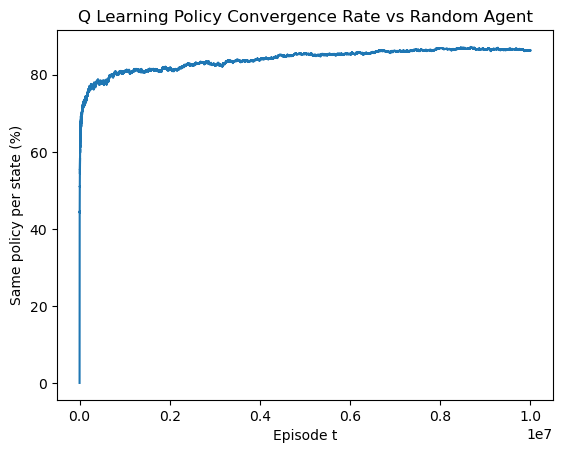

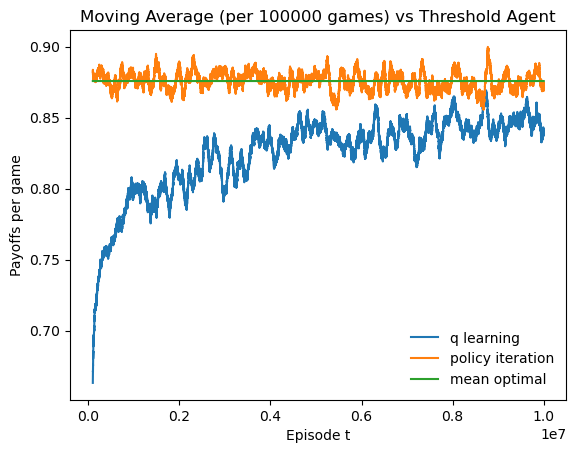

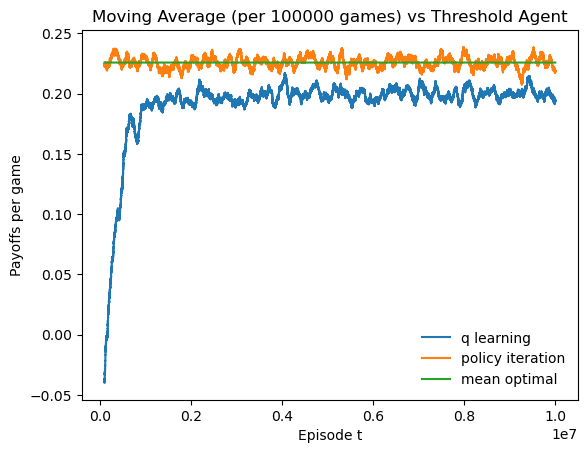

In [5]:
###########################################################
# Figure Utilities
###########################################################

import matplotlib.pyplot as plt
from utils import get_moving_average
import json
import os
from IPython import display

SAVE_FIGURES = True # save figures for latex
DISPLAY_FIGURES = True # display figures in notebook
saved_figures = []

class Figure:
    def __init__(self, title, xlabel, ylabel, x, ys, legends, filename):
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        for y in ys:
            plt.plot(x,y)
        plt.legend(legends, loc = "best", frameon = False)
        self.filename = filename
        self.save_figure_or_continue()
    def save_figure_or_continue(self):
        plt.show
        if DISPLAY_FIGURES: 
            plt.savefig(self.filename + ".png", bbox_inches = "tight")
            saved_figures.append(self.filename + ".png")
        if SAVE_FIGURES: plt.savefig("../latex/figures/" + self.filename + ".png", bbox_inches = "tight")
        plt.close()

def display_figures():
    """ A utility to display saved figures inside this notebook
    """
    filelist=os.listdir()
    for file in saved_figures:
        display.display(display.Image(file))

def delete_figures():
    """ A utility to delete saved figures
    """
    for file in saved_figures:
        os.remove(file)
        
###########################################################
# Figure generation
###########################################################

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_policy_evolution.json') as json_file:
    q_policy_evolution = json.load(json_file)
num_of_games = len(q_policy_evolution)

Figure(
    title = "Q Learning Policy Convergence Rate vs Random Agent",
    xlabel = "Episode t",
    ylabel = "Same policy per state (%)",
    x = range(1,num_of_games+1),
    ys = [q_policy_evolution],
    legends = (""),
    filename = "convergence_rate"
)

window_size = 10**5

print("Calculating q_random_moving_averages...")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_random_payoffs.json') as json_file:
    q_random_payoffs = json.load(json_file)

q_random_moving_averages = get_moving_average(q_random_payoffs, window_size)

print("Calculating pi_random_moving_averages...")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\pi_random_payoffs.json') as json_file:
    pi_random_payoffs = json.load(json_file)

pi_random_moving_averages = get_moving_average(pi_random_payoffs, window_size)

random_optimal_mean = sum(pi_random_payoffs)/len(pi_random_payoffs)

Figure(
    title = "Moving Average (per " + str(window_size) + " games) vs Threshold Agent",
    xlabel = "Episode t",
    ylabel = "Payoffs per game",
    x = range(window_size,len(q_random_moving_averages)+window_size),
    ys = [q_random_moving_averages, pi_random_moving_averages, [random_optimal_mean]*len(q_random_moving_averages)],
    legends = ("q learning", "policy iteration", "mean optimal"),
    filename = "moving_averages_random"
)

print("Calculating q_threshold_moving_averages...")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\q_threshold_payoffs.json') as json_file:
    q_threshold_payoffs = json.load(json_file)

q_threshold_moving_averages = get_moving_average(q_threshold_payoffs, window_size)

print("Calculating pi_threshold_moving_averages...")

with open(os.path.dirname(os.path.abspath(''))+'\\python\\pi_threshold_payoffs.json') as json_file:
    pi_threshold_payoffs = json.load(json_file)

pi_threshold_moving_averages = get_moving_average(pi_threshold_payoffs, window_size)

threshold_optimal_mean = sum(pi_threshold_payoffs)/len(pi_threshold_payoffs)

Figure(
    title = "Moving Average (per " + str(window_size) + " games) vs Threshold Agent",
    xlabel = "Episode t",
    ylabel = "Payoffs per game",
    x = range(window_size,len(q_threshold_moving_averages)+window_size),
    ys = [q_threshold_moving_averages, pi_threshold_moving_averages, [threshold_optimal_mean]*len(q_threshold_moving_averages)],
    legends = ("q learning", "policy iteration", "mean optimal"),
    filename = "moving_averages_threshold"
)

###########################################################
# Load generated figures & clean folder
###########################################################

if DISPLAY_FIGURES: 
    display_figures()
    delete_figures()